In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
class Perceptron: 
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.size_input = 0

    def init_weights(self):
        self.weights = np.random.rand(self.size_input + 1)

    def predict(self, X):
        X = np.insert(X, 0, 1)
        weighted_sum = np.dot(self.weights, X)
        prediction = 1 if weighted_sum > 0 else 0
        return prediction

    def fit(self, X_train, y_train, epochs=100):
        if self.size_input == 0:
            self.size_input = X_train.shape[1]
            self.init_weights()
        self.errors = []
        for _ in range(epochs):
            for X, y in zip(X_train, y_train):
                y_pred = self.predict(X)
                self.errors.append(np.abs(y - y_pred))
                self.weights += self.learning_rate * (y - y_pred) * np.insert(X, 0, 1)

## Task 1.17

In [3]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

and_perceptron = Perceptron()
and_perceptron.fit(X_and, y_and, epochs=500)

((-0.1, 1.1), (-0.1, 1.1))

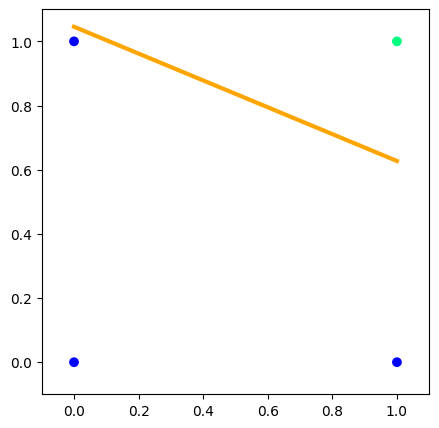

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X_and[:,0], X_and[:, 1], c=y_and, cmap='winter')

b = and_perceptron.weights[0]
W = and_perceptron.weights[1:3]
x1 = np.linspace(0, 1, 100)
x2 = - ( W[0] * x1 + b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)
ax.set_xlim(-.1, 1.1), ax.set_ylim(-.1, 1.1)

In [5]:
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

or_perceptron = Perceptron()
or_perceptron.fit(X_or, y_or, epochs=500)

In [6]:
[or_perceptron.predict(X) for X in X_or]

[0, 1, 1, 1]

((-0.1, 1.1), (-0.1, 1.1))

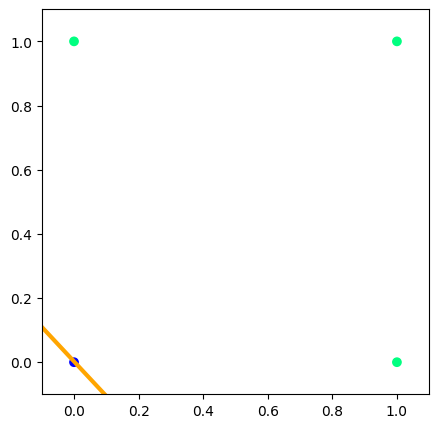

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X_or[:,0], X_or[:, 1], c=y_or, cmap='winter')

b = or_perceptron.weights[0]
W = or_perceptron.weights[1:3]
x1 = np.linspace(-.1, 1.1, 100)
x2 = - ( W[0] * x1 + b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)
ax.set_xlim(-.1, 1.1), ax.set_ylim(-.1, 1.1)

## Task 1.18

In [8]:
data = pd.read_csv('assign5data.csv')

<Axes: xlabel='# x0', ylabel='x1'>

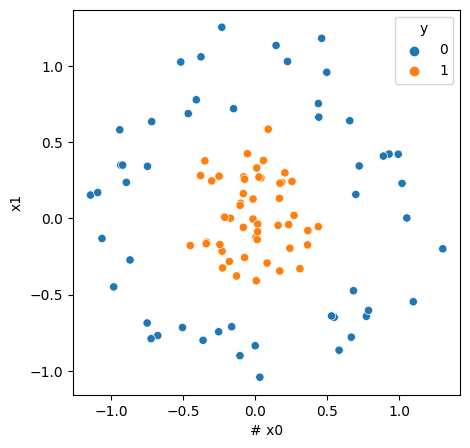

In [9]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='# x0', y='x1', data=data, hue='y')

In [10]:
test_size = .1
train = np.array(data.loc[:len(data)*(1 - test_size)])
test = np.array(data.loc[len(data)*(1 - test_size):])
X_train, y_train = train[:,:2], train[:,2]
X_test, y_test = test[:,:2], test[:,2]

In [11]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

predictions = []
for X in X_test:
    predictions.append(perceptron.predict(X))

(2,)


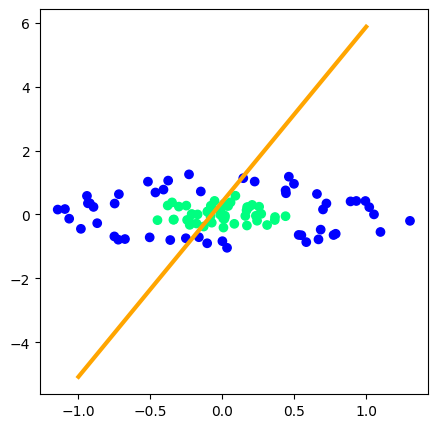

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
X = np.array(data[['# x0', 'x1']])
y = np.array(data['y'])
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

b = perceptron.weights[0]
W = perceptron.weights[1:3]
print(W.shape)
x1 = np.linspace(-1, 1, 100)
x2 = - ( W[0] * x1 + b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)
# ax.set_xlim(-1.2, 1.2), ax.set_ylim(-1.2, 1.2)

## Task 1.19

In [13]:
test_size = .1
train = np.array(data.loc[:len(data)*(1 - test_size)])
test = np.array(data.loc[len(data)*(1 - test_size):])
X_train, y_train = train[:,:2], train[:,2]
X_test, y_test = test[:,:2], test[:,2]

In [14]:
def add_feature(input):
    return np.insert(input, 0, input[0] ** 2 + input[1] ** 2)

In [15]:
# def add_feature(input):
#     input = np.insert(input, 0, input[1] ** 2 )
#     input = np.insert(input, 0, input[1] ** 2 )
#     return input

In [16]:
X_train = np.array([add_feature(X) for X in X_train])
X_test = np.array([add_feature(X) for X in X_test])

In [17]:
perceptron = Perceptron()

perceptron.fit(X_train, y_train, epochs=500)

predictions = []
for X in X_test:
    predictions.append(perceptron.predict(X))

In [18]:
b = perceptron.weights[0]
W = perceptron.weights[1:]

In [19]:
import sympy as sy

x0 = np.linspace(-1, 1, 100)
x1 = sy.Symbol('x1')

# eqs = np.array([sy.Eq( x1 ** 2 + W[0] / W[1] * x ** 2 + W[3] / W[1] * x1  + W[2] / W[1] * x + b / W[1] , 0) for x in x0])
eqs = np.array([sy.Eq( (x1 ** 2 + x ** 2) + W[2] / W[0] * x1  + W[1] / W[0] * x + b / W[0] , 0) for x in x0])

x1 = np.array([sy.solve(eq) for eq in eqs]).T
x1, x2 = x1

x1 = np.array([sy.re(x) for x in x1])
x2 = np.array([sy.re(x) for x in x2])

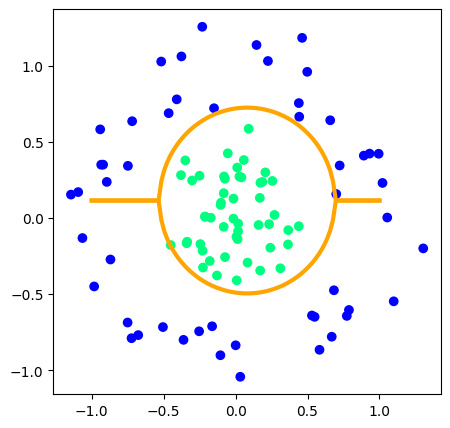

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
X = np.array(data[['# x0', 'x1']])
y = np.array(data['y'])
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

ax.plot(x0, x1, c='orange', lw=3)
ax.plot(x0, x2, c='orange', lw=3)